# 01 - Import Libraies

In [103]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Setting the Random Seeds

In [2]:
np.random.seed(42)
rn.seed(42)
keras.utils.set_random_seed(42)

# 02 - Load Dataset

1. Install the Kaggle library



In [3]:
! pip install -q kaggle

2. Make a directory named “.kaggle”



In [4]:
! mkdir ~/.kaggle

3. Copy the “kaggle.json” into this new directory



In [5]:
! cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


4. Allocate the required permission for this file.



In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Simply upload the “kaggle.json” to your Google Drive. For simplicity, upload it in the root folder rather than any folder structure.

In [7]:
!cp /content/drive/MyDrive/datasets/kaggle.json  ~/.kaggle/kaggle.json

Downloading Datasets:



In [8]:
! kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:06<00:00, 39.0MB/s]
100% 225M/225M [00:06<00:00, 36.9MB/s]


In [9]:
! unzip flowers-recognition

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [10]:
DIR_DAIZY='/content/flowers/daisy'
DIR_DANDELION='/content/flowers/dandelion'
DIR_ROSE='/content/flowers/rose' 
DIR_SUNFLOWER='/content/flowers/sunflower'
DIR_TULIP='/content/flowers/tulip'
IMG_SIZE=150
X=[]
Z=[]

In [11]:
def assign_label(img,flower_type):
    return flower_type
    

In [12]:
def load_data(flower_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img,flower_type)
    path = os.path.join(DIR,img)
    image=cv2.imread(path,cv2.IMREAD_COLOR)
    image=cv2.resize(image, (IMG_SIZE,IMG_SIZE))

    X.append(np.array(image))
    Z.append(str(label))

In [13]:
load_data('daisy',DIR_DAIZY)
print("------------")
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 499.32it/s]

------------
764


In [14]:
load_data('dandelion',DIR_DANDELION)
print("------------")
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 466.07it/s]

------------
1816


In [15]:
load_data('rose',DIR_ROSE)
print("------------")
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 401.51it/s]

------------
2600


In [16]:
load_data('sunflower',DIR_SUNFLOWER)
print("------------")
print(len(X))

100%|██████████| 733/733 [00:03<00:00, 192.31it/s]

------------
3333


In [17]:
load_data('tulip',DIR_TULIP)
print("------------")
print(len(X))

100%|██████████| 984/984 [00:05<00:00, 189.71it/s]

------------
4317


In [18]:
len(Z)

4317

In [19]:
#to fill RAM
#mem = []
#while True:
#    mem.append(' ' * 10**6)

# 03 - Preparing the Data


#### Visualizing some Random Images

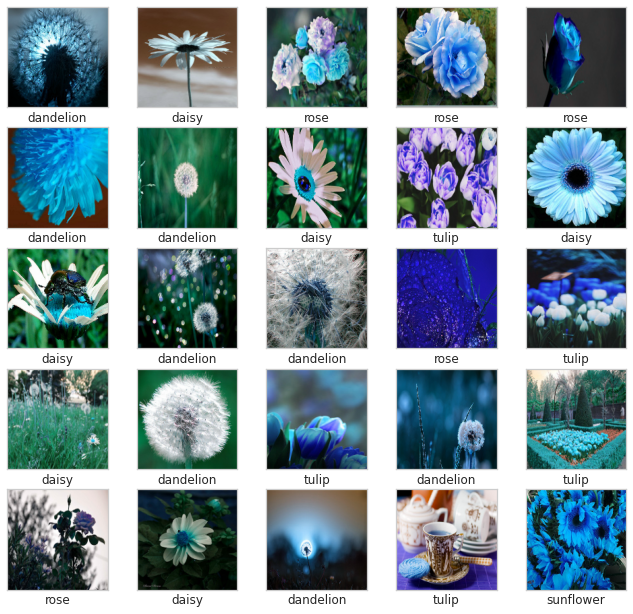

In [20]:
plt.figure(figsize=(10,10))
#fig,ax = plt.subplots(5,5)

for i in range(25):
  plt.subplot(5,5,1+i)
  l = rn.randint(0,len(Z))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[l])
  plt.xlabel(Z[l])
plt.show()

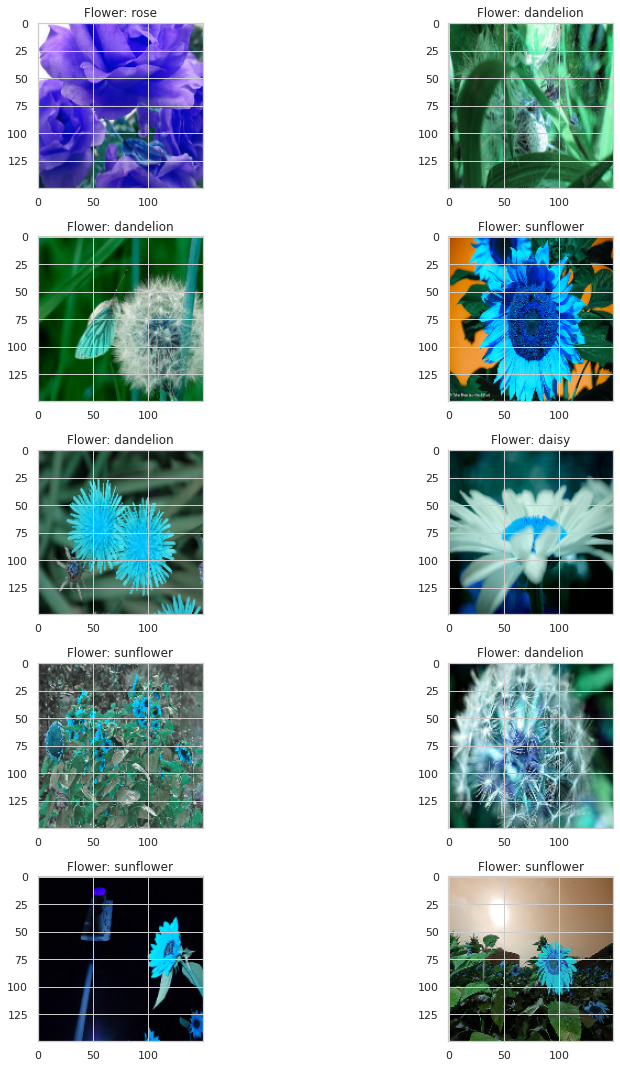

In [21]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

####  Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [22]:
set(Z)

{'daisy', 'dandelion', 'rose', 'sunflower', 'tulip'}

In [23]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,5)
Y[1]

array([1., 0., 0., 0., 0.], dtype=float32)

In [24]:
X[1]

array([[[ 12,  60, 106],
        [ 13,  59, 104],
        [ 18,  58, 101],
        ...,
        [ 59,  46,  45],
        [ 57,  44,  42],
        [ 57,  44,  42]],

       [[  0,  56, 121],
        [  0,  58, 121],
        [  1,  59, 117],
        ...,
        [ 65,  51,  52],
        [ 63,  50,  48],
        [ 62,  49,  47]],

       [[  4,  54, 130],
        [  4,  55, 131],
        [  3,  57, 130],
        ...,
        [ 69,  55,  56],
        [ 69,  55,  56],
        [ 68,  54,  55]],

       ...,

       [[  0,  23,  85],
        [  0,  23,  85],
        [  0,  23,  85],
        ...,
        [ 11,  11,  12],
        [ 16,  16,  17],
        [ 42,  42,  42]],

       [[  0,  18,  73],
        [  0,  19,  74],
        [  0,  20,  76],
        ...,
        [123, 123, 123],
        [133, 133, 133],
        [140, 140, 140]],

       [[  0,   8,  56],
        [  1,   8,  57],
        [  1,  10,  61],
        ...,
        [ 40,  41,  41],
        [ 38,  38,  39],
        [  7,   7,  11]]

#### Data scaling

In [25]:
X = np.array(X)
X=X/255
X[1]

array([[[0.04705882, 0.23529412, 0.41568627],
        [0.05098039, 0.23137255, 0.40784314],
        [0.07058824, 0.22745098, 0.39607843],
        ...,
        [0.23137255, 0.18039216, 0.17647059],
        [0.22352941, 0.17254902, 0.16470588],
        [0.22352941, 0.17254902, 0.16470588]],

       [[0.        , 0.21960784, 0.4745098 ],
        [0.        , 0.22745098, 0.4745098 ],
        [0.00392157, 0.23137255, 0.45882353],
        ...,
        [0.25490196, 0.2       , 0.20392157],
        [0.24705882, 0.19607843, 0.18823529],
        [0.24313725, 0.19215686, 0.18431373]],

       [[0.01568627, 0.21176471, 0.50980392],
        [0.01568627, 0.21568627, 0.51372549],
        [0.01176471, 0.22352941, 0.50980392],
        ...,
        [0.27058824, 0.21568627, 0.21960784],
        [0.27058824, 0.21568627, 0.21960784],
        [0.26666667, 0.21176471, 0.21568627]],

       ...,

       [[0.        , 0.09019608, 0.33333333],
        [0.        , 0.09019608, 0.33333333],
        [0.        , 0

In [26]:
print(X.shape)
print(Y.shape)

(4317, 150, 150, 3)
(4317, 5)


#### Splitting into Training and Validation Sets

In [27]:
x_train,x_test, y_train,y_test =train_test_split(X,Y,test_size=0.25,random_state=42)


In [28]:
print(f"X_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (3237, 150, 150, 3), y_train shape: (3237, 5)
X_test shape: (1080, 150, 150, 3), y_test shape: (1080, 5)


# 04 - Data Augmentation

In [29]:
batch_size=128
epochs=100

In [30]:


train_datagen = ImageDataGenerator(  
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False
                  )
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train,y_train,
                                     batch_size=batch_size )


In [31]:
train_generator.x.shape

(3237, 150, 150, 3)

# 05 - Modeling

### Building the ConvNet Model

In [32]:

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


#### Compiling the Keras Model & Summary

In [33]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

#### Fitting on the Training set and making predcitons on the Validation set

In [35]:

history = model.fit_generator(train_generator,
                              epochs=epochs,
                              validation_data=(x_test,y_test),
                              verbose=1,
                              )

# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/100
26/26 [==============================] - 27s 654ms/step - loss: 1.4924 - accuracy: 0.3250 - val_loss: 1.2266 - val_accuracy: 0.4556
Epoch 2/100
26/26 [==============================] - 24s 913ms/step - loss: 1.2230 - accuracy: 0.4832 - val_loss: 1.2029 - val_accuracy: 0.4889
Epoch 3/100
26/26 [==============================] - 16s 613ms/step - loss: 1.1118 - accuracy: 0.5524 - val_loss: 1.0555 - val_accuracy: 0.5907
Epoch 4/100
26/26 [==============================] - 16s 636ms/step - loss: 1.0097 - accuracy: 0.6043 - val_loss: 0.9148 - val_accuracy: 0.6454
Epoch 5/100
26/26 [==============================] - 16s 611ms/step - loss: 0.9459 - accuracy: 0.6348 - val_loss: 0.9120 - val_accuracy: 0.6333
Epoch 6/100
26/26 [==============================] - 31s 1s/step - loss: 0.9478 - accuracy: 0.6281 - val_loss: 0.9126 - val_accuracy: 0.6546
Epoch 7/100
26/26 [==============================] - 17s 650ms/step - loss: 0.8932 - accuracy: 0.6506 - val_loss: 0.8318 - val_accuracy: 0.

# 06 - Evaluating the Model Performance


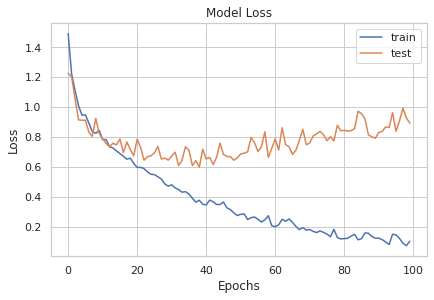

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

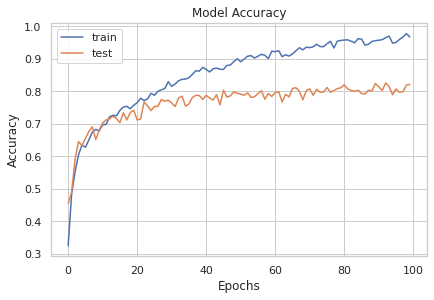

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [63]:
def calc_pred (model, data):
  prediction = model.predict(data)
  class_predicted= np.argmax(prediction,axis=1)
  return class_predicted

In [70]:
predicted_train = calc_pred(model,x_train)
predicted_test = calc_pred(model,x_test)
predicted_test

34/34 [==============================] - 0s 12ms/step


array([4, 2, 4, ..., 1, 1, 4])

In [75]:
train_label_np = np.argmax(y_train,axis=1)
train_label_np
test_label_np = np.argmax(y_test,axis=1)
test_label_np

array([4, 2, 2, ..., 1, 1, 4])

In [100]:
labels = []
for l in le.classes_:
  labels.append(l)
labels

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

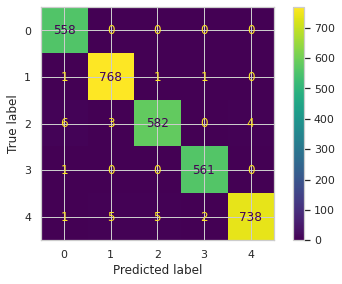

In [76]:
cm_train= confusion_matrix(train_label_np,predicted_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train )

disp.plot()

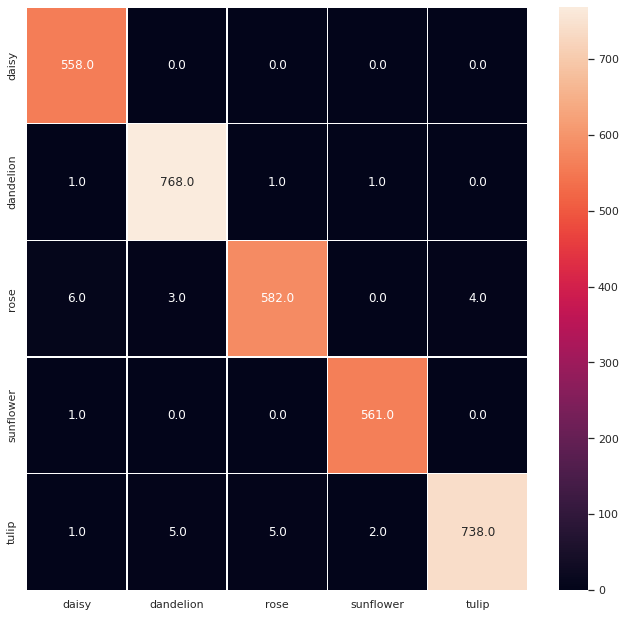

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_train, annot=True, fmt=".1f", linewidth=.5, xticklabels=labels, yticklabels=labels)

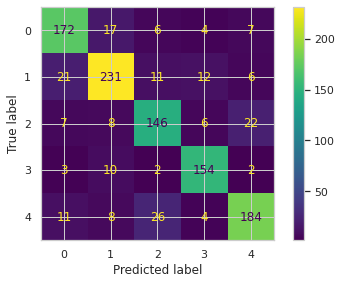

In [78]:
cm_test= confusion_matrix(test_label_np,predicted_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)

disp.plot()

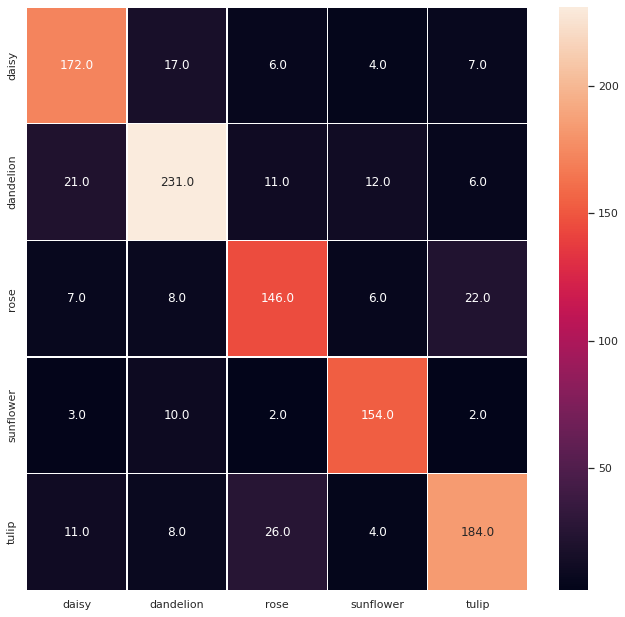

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_test, annot=True, fmt=".1f", linewidth=.5, xticklabels=labels, yticklabels=labels)

In [105]:
print(classification_report(test_label_np, predicted_test, target_names = labels))

              precision    recall  f1-score   support

       daisy       0.80      0.83      0.82       206
   dandelion       0.84      0.82      0.83       281
        rose       0.76      0.77      0.77       189
   sunflower       0.86      0.90      0.88       171
       tulip       0.83      0.79      0.81       233

    accuracy                           0.82      1080
   macro avg       0.82      0.82      0.82      1080
weighted avg       0.82      0.82      0.82      1080



# Thank You